# User input imputation

In [1]:
import pickle
from pathlib import Path

# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib as plt

import functions.continuous as funcs



## 1. Generate data with NaN

In [ ]:
# Your code here... Generate a dataset with 20-30% NaN values randomly distributed in the 'biometric' features.

In [2]:
df = pd.read_csv('../data/raw/workout_fitness_tracker_data.csv')

In [10]:
df_bio = df[['Age', 'Height (cm)', 'Weight (kg)', 'Sleep Hours', 'Resting Heart Rate (bpm)']]

In [11]:
print(df_bio.head())
print(df_bio.shape)

   Age  Height (cm)  Weight (kg)  Sleep Hours  Resting Heart Rate (bpm)
0   39          175           99          8.2                        61
1   36          157          112          8.6                        73
2   25          180           66          9.8                        80
3   56          154           89          5.8                        65
4   53          194           59          7.3                        59
(10000, 5)


In [12]:
df_bio 

,Age,Height (cm),Weight (kg),Sleep Hours,Resting Heart Rate (bpm)
0,39,175,99,8.2,61
1,36,157,112,8.6,73
2,25,180,66,9.8,80
3,56,154,89,5.8,65
4,53,194,59,7.3,59
...,...,...,...,...,...
9995,20,173,59,10.0,56
9996,29,171,71,9.4,72
9997,47,183,75,8.1,73
9998,52,170,97,7.3,84


In [19]:
df_bio_nan = df_bio.copy()
# Randomly select 25% of the data to be NaN

# Total number of elements (cells)
total_cells = df_bio_nan.shape[0] * df_bio_nan.shape[1]
num_nan = int(total_cells * 0.25)

# Generate random (row, col) positions
row_indices = np.random.randint(0, df_bio_nan.shape[0], num_nan)
col_indices = np.random.randint(0, df_bio_nan.shape[1], num_nan)
# Use zip to iterate over pairs and set NaNs` is iterating over pairs of row and column indices generated randomly earlier, and setting the corresponding elements in the DataFrame `df_bio_nan` to be NaN.

# Use zip to iterate over pairs and set NaNs
for row, col in zip(row_indices, col_indices):
    df_bio_nan.iat[row, col] = np.nan


print(f"Total NaNs inserted: {df_bio_nan.isna().sum().sum()} / {total_cells}")
print(df_bio_nan.isna().sum())

Total NaNs inserted: 11036 / 50000
Age                         2219
Height (cm)                 2199
Weight (kg)                 2187
Sleep Hours                 2217
Resting Heart Rate (bpm)    2214
dtype: int64


In [20]:
df_bio_nan 

,Age,Height (cm),Weight (kg),Sleep Hours,Resting Heart Rate (bpm)
0,NaN,175.0,99.0,8.2,61.0
1,NaN,157.0,112.0,8.6,73.0
2,25.0,180.0,66.0,9.8,80.0
3,56.0,154.0,89.0,NaN,65.0
4,53.0,194.0,59.0,7.3,59.0
...,...,...,...,...,...
9995,20.0,NaN,59.0,10.0,56.0
9996,29.0,171.0,71.0,9.4,NaN
9997,47.0,NaN,75.0,8.1,73.0
9998,52.0,170.0,97.0,7.3,84.0


## 2. Train imputer

In [30]:
from sklearn.impute import KNNImputer



# 1. Create the KNN imputer
imputer = KNNImputer(n_neighbors=3, weights='distance')  # or 'distance'

# 2. Fit and transform the NaN-filled DataFrame
df_bio_imputed = pd.DataFrame(
    imputer.fit_transform(df_bio_nan),
    columns=df_bio_nan.columns
)

# 4. Check
print("✅ Imputation complete. NaNs remaining:", df_bio_imputed.isna().sum().sum())

✅ Imputation complete. NaNs remaining: 0


## 3. Evaluate

In [31]:
# Your code here... Come up with a strategy to measure how good the imputation is.

In [32]:
import matplotlib.pyplot as plt

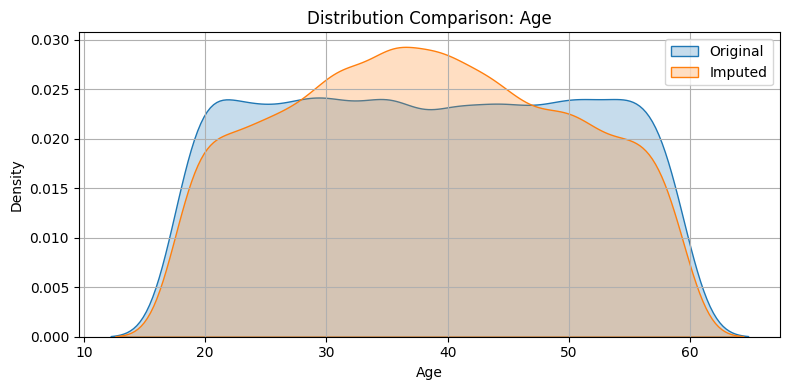

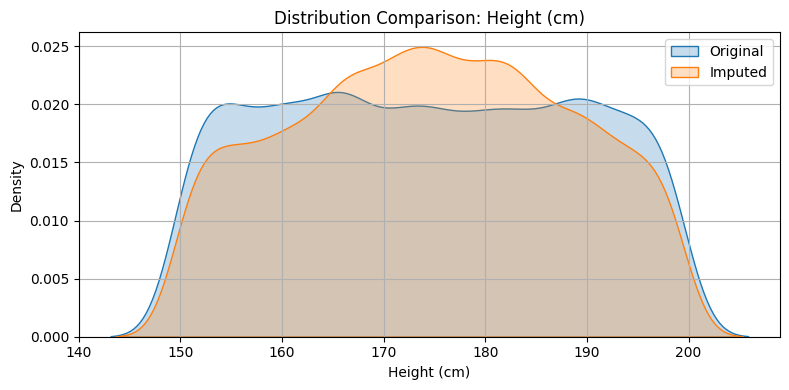

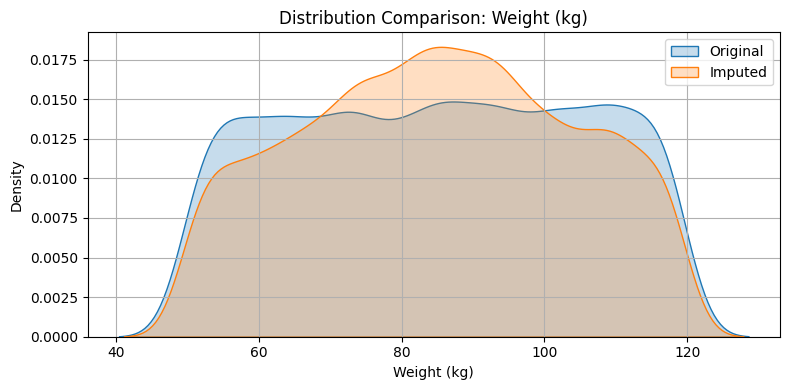

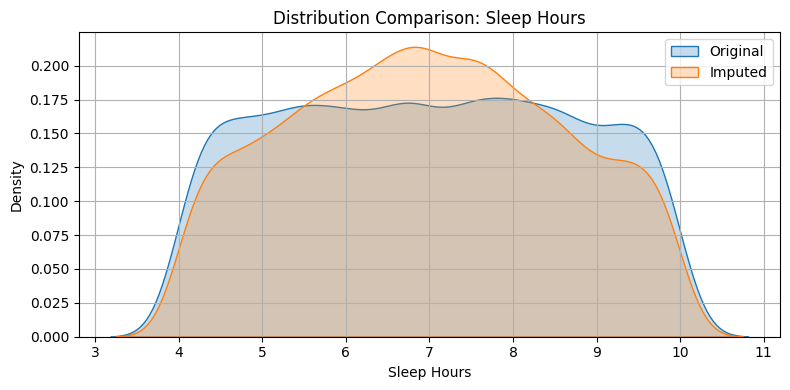

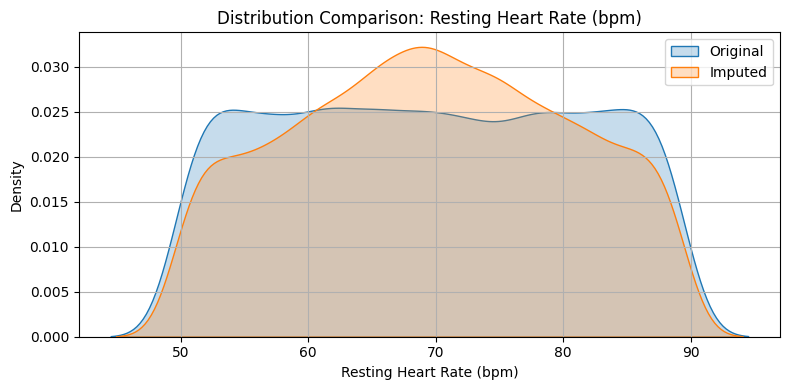

In [33]:
def compare_all_distributions(df_original, df_imputed):
    cols = df_original.columns
    for col in cols:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df_original[col].dropna(), label='Original', fill=True)
        sns.kdeplot(df_imputed[col].dropna(), label='Imputed', fill=True)
        plt.title(f'Distribution Comparison: {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Run it
compare_all_distributions(df_bio, df_bio_imputed)

## 4. Save

In [34]:
Path('../models').mkdir(exist_ok=True)

with open('../models/imputer.pkl', 'wb') as output_file:
    pickle.dump(imputer, output_file)